## IMPORT THE MODULES

In [1]:
#import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import missingno as msno
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder
sns.set()
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASET

In [3]:
#load the dataset
data = pd.read_csv('./DentalData811.csv')
data.head()

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
0,31/10/2023 08:55:03,M30,Pain,aching,Mild,lingering pain,No,No,No,No,...,No,No,No,No,No,No,Pulpitis,No,No,No
1,31/10/2023 09:11:12,F21,Pain,aching,Mild,The pain came suddenly,Eating,No,No,No,...,No,No,No,No,No,No,Food impaction,No,No,No
2,31/10/2023 09:28:50,M20,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,...,No,No,No,No,No,No,Pulpitis with swelling,No,No,No
3,31/10/2023 09:29:47,F34,Pain,throbbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,...,No,No,No,No,No,No,Acute pulpitis,No,No,No
4,31/10/2023 09:36:48,F5,Swelling,No,No,No,No,No,Slow,No,...,No,No,No,No,No,No,Periodontal abcess,No,No,No


In [4]:
y = data['Final Diagnosis']
print(y)
classes=y.unique()
print(len(classes))

0                                            Pulpitis
1                                      Food impaction
2                             Pulpitis with swelling 
3                                      Acute pulpitis
4                                  Periodontal abcess
                            ...                      
112    Irreversible pulpits with extra oral swelling 
113            Periodontitis with grade one mobility 
114                               Reversible pulpits 
115           Reversible pulpits with food impaction 
116                             Irreversible pulpits 
Name: Final Diagnosis, Length: 117, dtype: object
41


In [5]:
#checkout what all the classes are and number  of cases
class_counts = y.value_counts()
for c in classes:
    print(f'Number of {c}: {class_counts[c]}')

Number of Pulpitis: 1
Number of Food impaction: 1
Number of Pulpitis with swelling : 1
Number of Acute pulpitis: 1
Number of Periodontal abcess: 1
Number of Acute pulpits : 20
Number of Acute Pulpitis : 2
Number of Acute pulpits with acute gingivitis : 1
Number of Pulpits : 2
Number of Chronic destructive periodontitis: 1
Number of Acute pulpits with extra oral swelling : 1
Number of Aphthous ulcer: 2
Number of Acute pulpits with extra oral swelling: 1
Number of Acute reversible pulpits : 1
Number of Reversible pulpits : 20
Number of Acute gingivitis : 2
Number of Pulpits with swelling : 5
Number of Aphthous ulcer : 6
Number of Chronic pulpits with swelling : 1
Number of Dental caries with food impaction: 1
Number of Extra oral swelling with pulpits: 1
Number of Reversible pulpits with food impaction: 1
Number of Irreversible pulpitis: 1
Number of Extra oral swelling with irreversible pulpits : 3
Number of Periodontitis with grade 2 tooth mobility : 1
Number of Acute irreversible pulpi

<AxesSubplot:xlabel='count', ylabel='Final Diagnosis'>

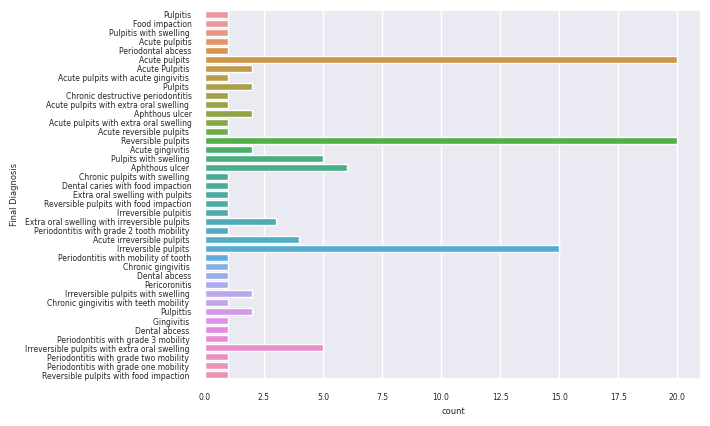

In [6]:
#plot and see the data
sns.set(font_scale=0.5)
sns.countplot(y=y, label="Number of cases")

## DATA PREPROCESSING

In [7]:
# look out for null values
data.isnull().sum()

Timestamp                                                                             0
Patient Number                                                                        0
Chief complaint                                                                       0
Nature of Pain                                                                        5
Severity of pain                                                                      6
Onset  and mode of pain                                                              11
Factors which worsens the pain                                                       11
Is the swelling painful?                                                             52
Has the swelling changed since it was first noticed? If yes how quickly?             51
Does the swelling changes during normal activities such as eating, speaking, etc?    51
Is the ulcer painful                                                                 63
Is there bleeding from the ulcer

In [8]:
# filling in missing values and checking again
data.fillna("No",inplace=True)
print(data.isnull().sum())
data.sample(10)


Timestamp                                                                            0
Patient Number                                                                       0
Chief complaint                                                                      0
Nature of Pain                                                                       0
Severity of pain                                                                     0
Onset  and mode of pain                                                              0
Factors which worsens the pain                                                       0
Is the swelling painful?                                                             0
Has the swelling changed since it was first noticed? If yes how quickly?             0
Does the swelling changes during normal activities such as eating, speaking, etc?    0
Is the ulcer painful                                                                 0
Is there bleeding from the ulcer           

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
21,03/11/2023 09:24:19,M14,Pain,throbbing,Moderate,The pain came suddenly,Laying down,No,No,No,...,No,No,No,No,No,No,Acute pulpits,No,No,No
86,06/11/2023 12:03:17,F11,Pain,aching,Mild,lingering pain,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Reversible pulpits,No,No,No
27,03/11/2023 10:48:49,F32,Ulcer,stabbing,Moderate,No,No,No,No,No,...,No,No,No,Yes,Yes,Yes,Aphthous ulcer,No,No,No
32,03/11/2023 11:01:21,F76,Pain,aching,Moderate,The pain came suddenly,Laying down,No,No,No,...,No,No,No,No,No,No,Acute pulpits,No,No,No
40,03/11/2023 11:11:28,F47,Swelling,aching,Moderate,No,Laying down,No,Slow,No,...,No,No,No,No,No,No,Pulpits with swelling,No,No,No
33,03/11/2023 11:02:10,F23,Pain,aching,Mild,The pain came suddenly,Cold foods or drinks,No,No,No,...,No,No,No,No,No,No,Reversible pulpits,No,No,No
69,06/11/2023 10:43:08,M29,Swelling,throbbing,Moderate,No,No,Yes,No,No,...,No,No,No,No,No,No,Dental abcess,No,No,1
47,03/11/2023 11:26:15,F27,Pain,throbbing,Severe,The pain came suddenly,Laying down,No,No,No,...,No,No,No,No,No,No,Reversible pulpits,No,No,No
43,03/11/2023 11:22:16,F35,Swelling,No,No,No,No,No,No,No,...,No,No,No,No,No,No,Chronic pulpits with swelling,No,No,No
15,03/11/2023 09:15:40,F49,Pain,throbbing,Moderate,No,Laying down,No,No,No,...,No,No,No,No,No,No,Acute pulpits,No,No,No


In [9]:
#Dropping unnecessary fields
data.drop('Timestamp',axis=1, inplace=True)
data.drop('Patient Number',axis=1, inplace=True)
data.sample(5)

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
63,Pain,aching,Mild,lingering pain,Cold foods or drinks,No,No,No,No,No,No,No,No,No,No,Reversible pulpits,No,No,No
77,Swelling,No,No,No,No,No,Slow,No,No,No,No,No,No,No,No,Extra oral swelling with irreversible pulpits,No,No,No
72,Pain,throbbing,Moderate,The pain came suddenly,Hot foods or drinks,No,No,No,No,No,No,No,No,No,No,Acute irreversible pulpits,No,No,No
29,Pain,No,Mild,lingering pain,Cold foods or drinks,No,No,No,No,No,No,No,No,No,No,Reversible pulpits,No,No,No
86,Pain,aching,Mild,lingering pain,Cold foods or drinks,No,No,No,No,No,No,No,No,No,No,Reversible pulpits,No,No,No


In [10]:
# #split the patient number into gender and age
# data['Gender'] = data['Patient Number'].str[0]
# data['Age'] = data['Patient Number'].str[1:].astype(int)
# data.sample(5)

In [11]:
#using ordinal encoder to change the fields to numerical values
encode=OrdinalEncoder(dtype=float)
# data_noage = data.drop('Age',axis=1)
# patient_encode=pd.DataFrame(encode.fit_transform(data_noage),columns=data_noage.columns)
patient_encode=pd.DataFrame(encode.fit_transform(data),columns=data.columns)
# patient_encode = pd.concat([patient_encode,data['Age']],axis=1) 
patient_encode.head(5)

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility"
0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,3.0
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,3.0
2,2.0,4.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,3.0
3,1.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0
4,2.0,0.0,2.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,3.0


In [12]:
patient_encode.to_csv('./DentalData811_encoded.csv',index=False)

In [13]:
train,test=train_test_split(patient_encode,test_size=0.3, random_state=42)
print(len(train))
print(len(test))

81
36


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train = train.drop(columns=['Final Diagnosis'])
y_train = train['Final Diagnosis']


X_test = test.drop(columns=['Final Diagnosis'])  
y_test = test['Final Diagnosis']


rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.estimators_ = [DecisionTreeClassifier() for _ in range(100)] 

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_accuracy = rf.score(X_test, y_test) 

print("Random Forest Accuracy:",rf_accuracy)

Random Forest Accuracy: 0.3888888888888889


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

# Train model
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

# Calculate F1 score 
f1 = f1_score(y_test, rf_pred, average='weighted')
print("F1 score:", f1)

# Can also calculate other scores
precision = precision_score(y_test, rf_pred, average='weighted')  
recall = recall_score(y_test, rf_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

F1 score: 0.3257834757834758
Precision: 0.3101851851851852
Recall: 0.3888888888888889


In [16]:
from sklearn.utils import resample

# Resample training data
X_resampled, y_resampled = resample(X_train, y_train, n_samples=len(X_train)*2, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# Evaluate
rf_pred = rf.predict(X_test)
f1 = f1_score(y_test, rf_pred, average='weighted')
print('F1 Score:', f1)

F1 Score: 0.3276353276353276


In [17]:
print(X_train.shape[1])

18


In [20]:
from imblearn.ensemble import BalancedBaggingClassifier

# Bagging classifier with random undersampling
bbc = BalancedBaggingClassifier(base_estimator=rf,
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)

# Train on imbalanced data
bbc.fit(X_train, y_train) 

# Predict on test set
y_pred = bbc.predict(X_test)

# Evaluate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
print('F1 Score:', f1)
print('Recall Score:', recall)

F1 Score: 0.22685185185185183
Recall Score: 0.3611111111111111


In [22]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)
f1=f1_score(y_test, y_pred, average="weighted")
recall=recall_score(y_test,rf_pred, average="weighted")
print("F1 Score:", f1)
print("Recall Score:", recall)


F1 Score: 0.22685185185185183
Recall Score: 0.3611111111111111


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get predictions 
rf_probs = rf.predict_proba(X_test)

# Reshape to 2D
y_test = y_test.reshape(-1, 1)  
rf_probs = rf_probs.reshape(-1, 1)

# Threshold search
step_factor = 0.05
threshold = 0.2
max_roc = 0

while threshold <= 0.8:

    pred_class = (rf_probs[:,0] >= threshold).astype('int')
    
    # Reshape pred class to 2D
    pred_class = pred_class.reshape(-1, 1)
    
    roc = roc_auc_score(y_test, pred_class, multi_class='ovr')
    
    if roc > max_roc:
        max_roc = roc
        best_threshold = threshold
        
    threshold += step_factor
    
print("Best Threshold:", best_threshold)
print("ROC AUC:", max_roc)

# Final prediction
final_pred = (rf_probs[:,0] >= best_threshold).astype('int')

AttributeError: 'Series' object has no attribute 'reshape'

In [16]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Extract X and y
X_train = train.drop('Final Diagnosis', axis=1) 
y_train = train['Final Diagnosis']

X_test = test.drop('Final Diagnosis', axis=1)
y_test = test['Final Diagnosis']

# Create LogisticRegression instance 
logreg = LogisticRegression()

# Fit on training data
logreg.fit(X_train, y_train)  

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", 
      accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.4166666666666667
